In [103]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
doping=pd.read_excel('doping.xlsx')
doping

,firstname,lastname,countrycode,country,sex,type,rule,infractiondate,ineligibleyears,sanction,ineligabletodate
0,Elmar,Lichtenegger,AUT,Austria,M,AAF,Norandrosterone,2007-11-20,100.000,Lifetime ban (2nd ADRV),Lifetime ban
1,Susanne,Pumper,AUT,Austria,F,IAAF rule 32.2f,Possession of a Prohibited Substance or a Proh...,2009-02-01,8.000,8 years ineligibility,2020-03-05 00:00:00
2,Chaltu,Beji,AZE,Azerbaijan,F,AAF,Ostarine,2015-06-21,4.000,4 years ineligibility,2019-06-26 00:00:00
3,Dzmitry,Marshin,AZE,Azerbaijan,M,AAF,Dehydrochloromethyl testosterone,2015-05-29,4.000,4 years ineligibility,2019-06-28 00:00:00
4,Tsehynesh,Tsale,AZE,Azerbaijan,F,AAF,Metenolone,2013-12-27,2.000,2 years ineligibility,2016-02-10 00:00:00
5,Momhed,Khalifa,BHR,Bahrain,M,AAF,Prednisolone,2015-04-15,2.000,2 years ineligibility,2017-05-11 00:00:00
6,SALEM Marwa,Salah,BRN,Bahrain,F,n.a.,Oxandrolone,2013-10-28,2.000,2 years ineligibility,2015-12-01 00:00:00
7,Natallia,Kareiva,BLR,Belarus,F,IAAF Rule 32.2b,ABP Case - Use/attempted use of a prohibited s...,2010-07-28,2.000,2 years ineligibility,2016-08-21 00:00:00
8,Pavel,Kryvitski,BLR,Belarus,M,AAF,Growth Hormone (hGH),2015-05-11,4.000,4 years ineligibility,2019-06-10 00:00:00
9,Andrei,Mikhnevich,BLR,Belarus,M,AAF,"Clenbuterol, Methandienone & Oxandrolone",2005-08-06,100.000,Lifetime ban,Lifetime ban


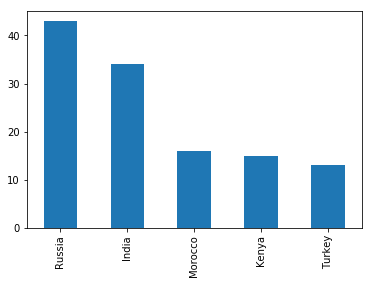

In [51]:
doping['country'].value_counts().head().plot(kind='bar')

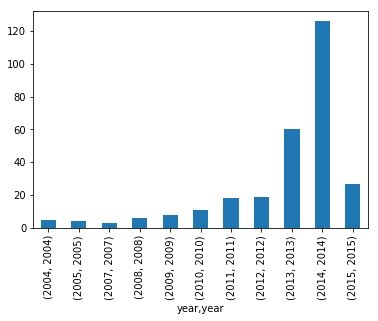

In [101]:
df3= df.groupby('year')['year'].value_counts().plot(kind='bar')
#.value_counts().plot(kind='bar')

#

In [ ]:
df.groupby('year')df[df['country']=='Russia']

In [12]:
doping['rule'].value_counts().head()

Stanozolol                                                       25
Norandrosterone                                                  22
EPO                                                              18
ABP Case - Use/attempted use of a prohibited substance/method    14
Dehydrochloromethyltestosterone                                  10
Name: rule, dtype: int64

In [42]:
doping['sanction'].value_counts().head()

2 years ineligibility      153
4 years ineligibility       38
Lifetime ban (2nd ADRV)     17
Lifetime ban                11
8 years ineligibility       10
Name: sanction, dtype: int64

In [ ]:
#compared to what
#look at countries' rate of doping over time. has russia always had the highest number of infractions? 
#are there more male of females doping? 
#use a regex to extract the date and make a new column with year

#separate chart of countries looking at number of infractions 

In [ ]:
#look at rate of doping over time. when was there a peak? 
#how has the number of infractions fluctuated over time for men compared to women?
doping['sex'].value_counts().head().plot()

In [15]:
df['infractiondate'] = pd.to_datetime(df['infractiondate'])
df['year'], df['month'] = df['infractiondate'].dt.year, df['infractiondate'].dt.month
df

,firstname,lastname,countrycode,country,sex,type,rule,infractiondate,ineligibleyears,sanction,ineligabletodate,year,month
0,Elmar,Lichtenegger,AUT,Austria,M,AAF,Norandrosterone,2007-11-20,100.000,Lifetime ban (2nd ADRV),Lifetime ban,2007,11
1,Susanne,Pumper,AUT,Austria,F,IAAF rule 32.2f,Possession of a Prohibited Substance or a Proh...,2009-02-01,8.000,8 years ineligibility,2020-03-05 00:00:00,2009,2
2,Chaltu,Beji,AZE,Azerbaijan,F,AAF,Ostarine,2015-06-21,4.000,4 years ineligibility,2019-06-26 00:00:00,2015,6
3,Dzmitry,Marshin,AZE,Azerbaijan,M,AAF,Dehydrochloromethyl testosterone,2015-05-29,4.000,4 years ineligibility,2019-06-28 00:00:00,2015,5
4,Tsehynesh,Tsale,AZE,Azerbaijan,F,AAF,Metenolone,2013-12-27,2.000,2 years ineligibility,2016-02-10 00:00:00,2013,12
5,Momhed,Khalifa,BHR,Bahrain,M,AAF,Prednisolone,2015-04-15,2.000,2 years ineligibility,2017-05-11 00:00:00,2015,4
6,SALEM Marwa,Salah,BRN,Bahrain,F,n.a.,Oxandrolone,2013-10-28,2.000,2 years ineligibility,2015-12-01 00:00:00,2013,10
7,Natallia,Kareiva,BLR,Belarus,F,IAAF Rule 32.2b,ABP Case - Use/attempted use of a prohibited s...,2010-07-28,2.000,2 years ineligibility,2016-08-21 00:00:00,2010,7
8,Pavel,Kryvitski,BLR,Belarus,M,AAF,Growth Hormone (hGH),2015-05-11,4.000,4 years ineligibility,2019-06-10 00:00:00,2015,5
9,Andrei,Mikhnevich,BLR,Belarus,M,AAF,"Clenbuterol, Methandienone & Oxandrolone",2005-08-06,100.000,Lifetime ban,Lifetime ban,2005,8


In [108]:
df2= df.groupby('year')['sex'].value_counts()
df2
#.plot(kind='bar', stacked=True)

#chart male and female with bars next to each other in two separate colors for each year %pylab inline


#df2 = df.groupby(['year', 'sex'])['year'].value_counts().unstack('sex').fillna(0).plot(kind=)
#df2[['sex','year']].plot(kind='bar', stacked=True)


year  sex
2004  F       3
      M       2
2005  M       3
      F       1
2007  M       2
      F       1
2008  M       5
      F       1
2009  M       5
      F       3
2010  F       6
      M       5
2011  M      14
      F       4
2012  F      10
      M       9
2013  M      32
      F      28
2014  M      80
      F      46
2015  M      18
      F       9
Name: sex, dtype: int64

In [77]:
pd.set_option('display.max_rows', 500)
df2=df.groupby('year')['country'].value_counts()
df2
#.plot(kind='bar')

year  country             
2004  Russia                   2
      USA                      2
      Ukraine                  1
2005  Belarus                  1
      Romania                  1
      South Africa             1
      Ukraine                  1
2007  Austria                  1
      Italy                    1
      Turkey                   1
2008  Bulgaria                 1
      Greece                   1
      Italy                    1
      Portugal                 1
      Slovakia                 1
      Ukraine                  1
2009  Brazil                   2
      Austria                  1
      Germany                  1
      India                    1
      Romania                  1
      Russia                   1
      USA                      1
2010  India                    2
      Turkey                   2
      Belarus                  1
      Morocco                  1
      Nigeria                  1
      Portugal                 1
      Romania   

In [82]:
df2.to_csv('doping2.csv')

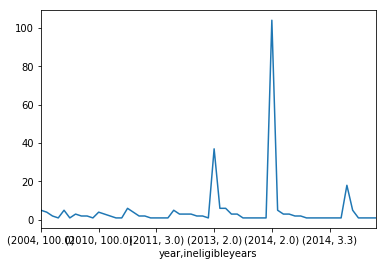

In [49]:
df.groupby('year')['ineligibleyears'].value_counts().plot()


In [47]:
df['ineligibleyears'].value_counts()

2.000      155
4.000       38
100.000     33
8.000       17
3.000        9
2.500        7
10.000       6
6.000        5
1.500        3
5.000        2
1.000        2
1.750        2
0.750        1
3.300        1
12.000       1
2.250        1
3.750        1
1.670        1
3.670        1
4.417        1
Name: ineligibleyears, dtype: int64